In [10]:
#--Importing nessesary libraries --#

import sklearn
import pandas as pd
from sklearn.preprocessing import(StandardScaler, LabelEncoder)
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans

In [11]:
#-- Importing the dataset --#
df_raw = pd.read_csv("/Users/lindasegalini/Desktop/WGU/New Program/D212 Advanced Data Mining/churn_clean.csv")
df_raw.dtypes

CaseOrder                 int64
Customer_id              object
Interaction              object
UID                      object
City                     object
State                    object
County                   object
Zip                       int64
Lat                     float64
Lng                     float64
Population                int64
Area                     object
TimeZone                 object
Job                      object
Children                  int64
Age                       int64
Income                  float64
Marital                  object
Gender                   object
Churn                    object
Outage_sec_perweek      float64
Email                     int64
Contacts                  int64
Yearly_equip_failure      int64
Techie                   object
Contract                 object
Port_modem               object
Tablet                   object
InternetService          object
Phone                    object
Multiple                 object
OnlineSe

In [12]:
#-- Dropping the null values --#
df_raw.dropna()
df_raw.shape

(10000, 50)

 # Seperating the continous variables and exploring for correlation.

In [13]:
str_list = [] #-- A empty list to contain columns with strings (words) --#
for colname, colvalue in df_raw.iteritems():
    if type(colvalue[1]) == str:
         str_list.append(colname)
#-- Get to the numeric columns by inversion --#           
num_list = df_raw.columns.difference(str_list)  

In [14]:
teleco_num = df_raw[num_list]

teleco_num.head()

,Age,Bandwidth_GB_Year,CaseOrder,Children,Contacts,Email,Income,Item1,Item2,Item3,...,Item7,Item8,Lat,Lng,MonthlyCharge,Outage_sec_perweek,Population,Tenure,Yearly_equip_failure,Zip
0,68,904.536110,1,0,0,10,28561.99,5,5,5,...,3,4,56.25100,-133.37571,172.455519,7.978323,38,6.795513,1,99927
1,27,800.982766,2,1,0,12,21704.77,3,4,3,...,4,4,44.32893,-84.24080,242.632554,11.699080,10446,1.156681,1,48661
2,50,2054.706961,3,4,0,9,9609.57,4,4,2,...,3,3,45.35589,-123.24657,159.947583,10.752800,3735,15.754144,1,97148
3,48,2164.579412,4,1,2,15,18925.23,4,4,4,...,3,3,32.96687,-117.24798,119.956840,14.913540,13863,17.087227,0,92014
4,83,271.493436,5,0,2,16,40074.19,4,4,4,...,4,5,29.38012,-95.80673,149.948316,8.147417,11352,1.670972,1,77461


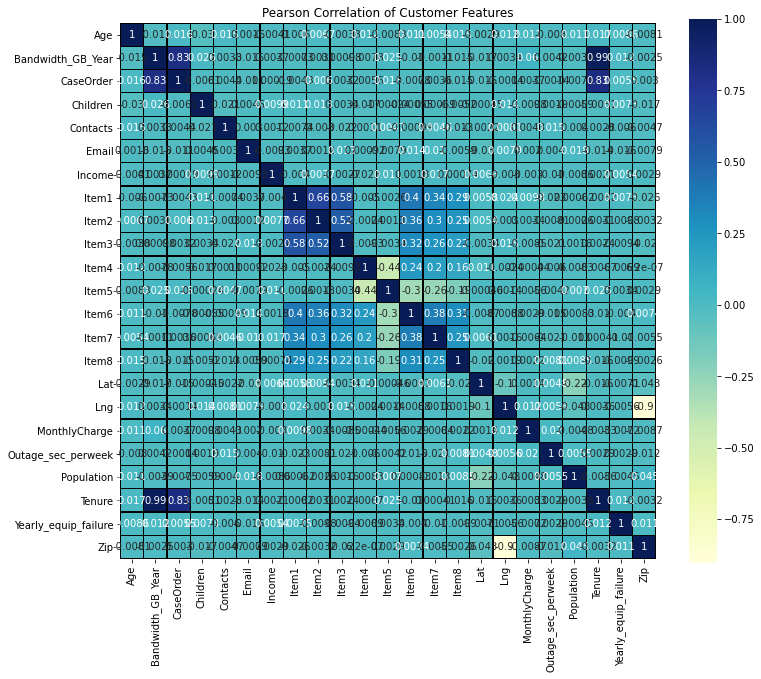

In [15]:
#-- Exploring for correlations between varaibles with matplotlib --#
f, ax = plt.subplots(figsize=(12, 10))
plt.title('Pearson Correlation of Customer Features')
# Draw the heatmap using seaborn
sns.heatmap(teleco_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black', annot=True)

Dropping the questionare "Items"due to  multi-colinarity and simplicity. Also dropping "Bandwidth_GB_Year", and "CaseOrder" due to  multi-colinarity with "Tenure". 

In [16]:
#-- Creating a new dataframe with the continous variables minus Questionare iteams and Bandwidth_GB_Year--#

teleco_lean = teleco_num.drop(['Item1', 'Item2','Item3','Item3','Item4','Item5', 'Item6','Item7','Item8', 
                               'Bandwidth_GB_Year','CaseOrder'], axis =1)

teleco_lean

,Age,Children,Contacts,Email,Income,Lat,Lng,MonthlyCharge,Outage_sec_perweek,Population,Tenure,Yearly_equip_failure,Zip
0,68,0,0,10,28561.99,56.25100,-133.37571,172.455519,7.978323,38,6.795513,1,99927
1,27,1,0,12,21704.77,44.32893,-84.24080,242.632554,11.699080,10446,1.156681,1,48661
2,50,4,0,9,9609.57,45.35589,-123.24657,159.947583,10.752800,3735,15.754144,1,97148
3,48,1,2,15,18925.23,32.96687,-117.24798,119.956840,14.913540,13863,17.087227,0,92014
4,83,0,2,16,40074.19,29.38012,-95.80673,149.948316,8.147417,11352,1.670972,1,77461
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,23,3,2,12,55723.74,43.43391,-72.78734,159.979400,9.415935,640,68.197130,0,5758
9996,48,4,2,15,34129.34,36.56907,-87.41694,207.481100,6.740547,77168,61.040370,0,37042
9997,48,1,0,10,45983.43,35.52039,-100.44180,169.974100,6.590911,406,47.416890,0,79061
9998,39,1,1,14,16667.58,33.58016,-85.13241,252.624000,12.071910,35575,71.095600,0,30117


# Scaling the data

In [17]:
#-- Create the object --#

scaler = StandardScaler()

#-- Calculate the mean and Standard deviation --#
scaler.fit(teleco_lean)

teleco_scaled = scaler.transform(teleco_lean)

In [19]:
#-- Saving copy of the cleaned dataset --#
pd.DataFrame(teleco_scaled).to_csv('/Users/lindasegalini/Desktop/WGU/New Program/D212 Advanced Data Mining/Clustering.csv')

# Conducting PCA 
To check the variance of the individual features and reduce the dataset for K-means.

In [ ]:
#-- Calculating Eigenvectors and eigenvalues of Cov matrix --#
mean_vec = np.mean(teleco_scaled, axis=0)
cov_mat = np.cov(teleco_scaled.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
#-- Create a list of (eigenvalue, eigenvector) tuples --#
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

#-- Sort from high to low --#
eig_pairs.sort(key = lambda x: x[0], reverse= True)

#-- Calculation of Explained Variance from the eigenvalues --#
tot = sum(eig_vals)
#-- Individual explained variance --#
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] 
#-- Cumulative explained variance --#
cum_var_exp = np.cumsum(var_exp) 


The variances are well distributed amoungst the Principal Components.

In [ ]:
#-- Plot out the variances superimposed --#
plt.figure(figsize=(10, 5))
plt.bar(range(len(var_exp)), var_exp, alpha=0.3333, align='center', label='individual explained variance', color = 'g')
plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

# Determining the number of clusters with the Elbow Method

In [ ]:
#-- Kmeans clustering with PCA --#

wcss = []
for i in range(1,13):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++',random_state = 42)
    kmeans_pca.fit(teleco_scaled)
    wcss.append(kmeans_pca.inertia_)

In [ ]:
#-- Now plotting the Elbow graph by passing the  --#
plt.figure(figsize = (20,20))
plt.plot(range(1,13), wcss, marker ='o', linestyle ='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA clustering ')

In [ ]:
#-- Exploring how the data clusters when transformed with PCA when k=1 --#

pca = PCA(n_components=12)
pca_kmeans = pca.fit_transform(teleco_scaled)
plt.figure(figsize = (9,7))

#-- Changing the indices pca-kmeans[:,1], changes the number of clusters too--#
plt.scatter(pca_kmeans[:,0],pca_kmeans[:,1], c='goldenrod',alpha=0.5) 
plt.ylim(-10,30)
plt.show()

In [ ]:
#-- Now running KMeans with 2 clusters --#
kmeans_pca = KMeans(n_clusters =2, init = 'k-means++', random_state = 42)



In [ ]:
#-- Kmeans with two clusters --#

#-- Compute cluster centers by fitting the data to the model and predict cluster indices --#
X_clustered = kmeans_pca.fit_predict(pca_kmeans)

# Define our own color map
LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(pca_kmeans[:,0],pca_kmeans[:,2], c= label_color, alpha=0.5) 
plt.show()

In [ ]:
#-- Set a 'k' to 3 clusters --#
kmeans = KMeans(n_clusters=3)
# Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(pca_kmeans)

#-- Define the color map --#
LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b',3:'y'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

#-- Plot the scatter digram --#
plt.figure(figsize = (7,7))
plt.scatter(pca_kmeans[:,0],pca_kmeans[:,3], c= label_color, alpha=0.5) 
plt.show()

In [ ]:
#-- Setting 'k' to 4 clusters --#
kmeans = KMeans(n_clusters=4)

#-- Compute cluster centers and predict cluster indices --#
X_clustered = kmeans.fit_predict(pca_kmeans)

#-- Define the color map --#
LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b',3:'y'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

#-- Plot the scatter diagram --#
plt.figure(figsize = (7,7))
plt.scatter(pca_kmeans[:,0],pca_kmeans[:,4], c= label_color, alpha=0.5) 
plt.show()

Drilling down further, Notice the bimodal distrobutions. 

In [ ]:
#-- Creating a dataframe with the original features adn add the PCA scores and assigned clusters for each row --#
df_scaled_pca_kmeans = pd.concat([teleco_lean,pd.DataFrame(pca_kmeans)], axis = 1)
df_scaled_pca_kmeans.columns.values[-3:] = ['Component1', 'Component2','Component3'] #'Component4','Component5', 'Component6','Component7', 'Component8','Component9', 'Component10','Component11', 'Component12']

#-- The last columns contains the PCA - Kmeans clustering labels, for two clusters, per datapiont--#

df_scaled_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_
df_scaled_pca_kmeans['Segment'] = df_scaled_pca_kmeans['Segment K-means PCA'].map({0:'first',
                                                                                  1: 'Second'})
df_scaled_pca_kmeans.head()

